In [1]:
#Part B
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('BostonHousing7.csv')

# Define the predictor variables and the target variable
X = df[['CRIM', 'CHAS', 'RM']]
y = df['MEDV']

# Add a constant to the predictor variables (required for the intercept in the model)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the intercept and coefficients
intercept = model.params['const']
coefficients = model.params.drop('const')

print(f"Intercept: {intercept}")
print("Coefficients:")
print(coefficients)



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Intercept: -28.81068250635915
Coefficients:
CRIM   -0.260724
CHAS    3.763037
RM      8.278180
dtype: float64


In [2]:
#Part c
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('bostonhousing7.csv')

# Define the features and the target variable
X = data[['CRIM', 'RM', 'CHAS']]
y = data['MEDV']  # Replace 'target' with the actual name of your target column

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Define the new data for prediction
new_data = pd.DataFrame({'CRIM': [0.1], 'RM': [6], 'CHAS': [0]})

# Make the prediction
prediction = model.predict(new_data)
print(prediction)

[20.83232392]


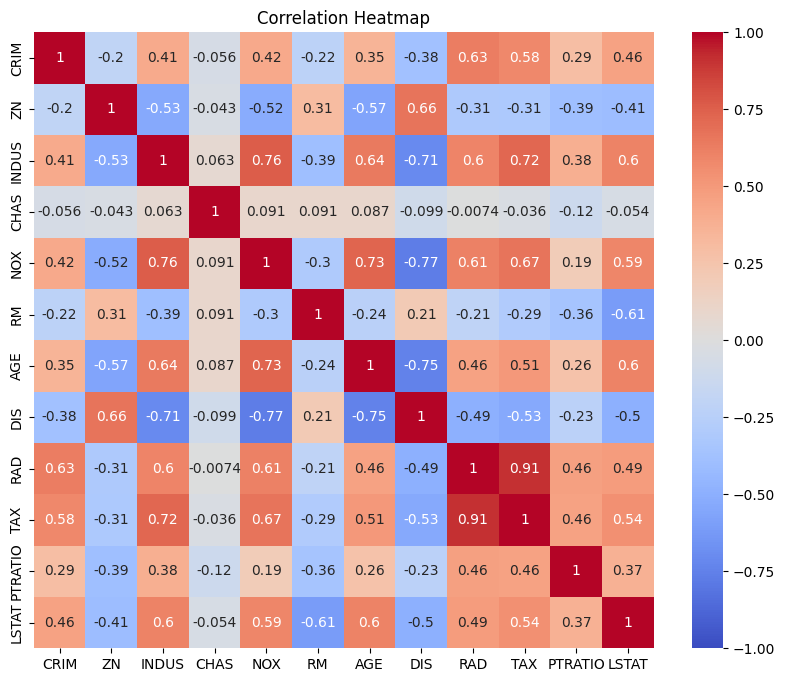

Highly correlated pairs (correlation above 0.7 or below -0.7):
INDUS - NOX: 0.76
INDUS - DIS: -0.71
INDUS - TAX: 0.72
NOX - INDUS: 0.76
NOX - AGE: 0.73
NOX - DIS: -0.77
AGE - NOX: 0.73
AGE - DIS: -0.75
DIS - INDUS: -0.71
DIS - NOX: -0.77
DIS - AGE: -0.75
RAD - TAX: 0.91
TAX - INDUS: 0.72
TAX - RAD: 0.91


In [3]:
#Part d
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bostonhousing7.csv')

# Select the 12 numerical predictors (assuming columns 1 to 12 are the numerical predictors)
numerical_predictors = data.iloc[:, :-2]  # Exclude the last two columns

# Compute the correlation matrix
correlation_matrix = numerical_predictors.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated pairs (above 0.7 or below -0.7)
threshold = 0.7
high_corr_pairs = [(i, j, correlation_matrix.loc[i, j]) for i in correlation_matrix.columns for j in correlation_matrix.columns if i != j and (correlation_matrix.loc[i, j] > threshold or correlation_matrix.loc[i, j] < -threshold)]

# Print highly correlated pairs
print("Highly correlated pairs (correlation above 0.7 or below -0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

In [6]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     --                                       0.1/1.4 MB 2.6 MB/s eta 0:00:01
     -----                                    0.2/1.4 MB 3.1 MB/s eta 0:00:01
     ------------                             0.5/1.4 MB 3.5 MB/s eta 0:00:01
     ---------------                          0.6/1.4 MB 3.3 MB/s eta 0:00:01
     -------------------------                0.9/1.4 MB 3.9 MB/s eta 0:00:01
     ---------------------------------        1.2/1.4 MB 4.5 MB/s eta 0:00:01
     ---------------------------------        1.2/1.4 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 4.0 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


D:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters

Backward Stepwise Regression:
RMSE: 0.1960
MAPE: 504156430999384.5625
Mean Error: -0.0399

Forward Stepwise Regression:
RMSE: 0.1945
MAPE: 497130004315813.0625
Mean Error: -0.0382

Both Stepwise Regression:
RMSE: 0.1960
MAPE: 504156430999384.5625
Mean Error: -0.0399



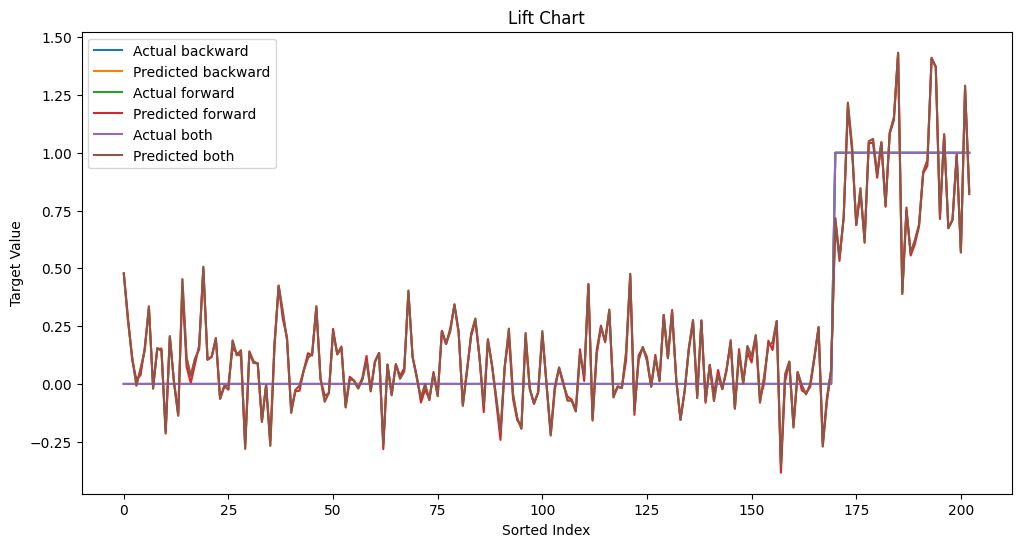

The best model is obtained using forward stepwise regression.
Selected features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT', 'MEDV']


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bostonhousing7.csv')

# Define the predictors and target variable
X = data.iloc[:, :-1]  # Assuming the last column is the target
y = data.iloc[:, -1]   # Adjust the column indices as needed

# Split the data into training (60%) and validation (40%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Function to compute evaluation metrics
def compute_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_error = np.mean(y_true - y_pred)
    return rmse, mape, mean_error

# Function to perform stepwise regression
def stepwise_regression(X_train, y_train, direction):
    sfs = SFS(LinearRegression(),
              k_features='best',
              forward=(direction in ['forward', 'both']),
              floating=(direction == 'both'),
              scoring='neg_mean_squared_error',
              cv=5)
    sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)
    return selected_features

# Perform stepwise regression in three directions
directions = ['backward', 'forward', 'both']
models = {}
for direction in directions:
    selected_features = stepwise_regression(X_train, y_train, direction)
    model = LinearRegression().fit(X_train[selected_features], y_train)
    models[direction] = (model, selected_features)

# Predict the validation set and compute metrics
metrics = {}
for direction, (model, selected_features) in models.items():
    y_pred = model.predict(X_valid[selected_features])
    rmse, mape, mean_error = compute_metrics(y_valid, y_pred)
    metrics[direction] = {'rmse': rmse, 'mape': mape, 'mean_error': mean_error}

# Print the evaluation metrics
for direction, metric in metrics.items():
    print(f"{direction.capitalize()} Stepwise Regression:")
    print(f"RMSE: {metric['rmse']:.4f}")
    print(f"MAPE: {metric['mape']:.4f}")
    print(f"Mean Error: {metric['mean_error']:.4f}")
    print()

# Plot lift charts
plt.figure(figsize=(12, 6))
for direction, (model, selected_features) in models.items():
    y_pred = model.predict(X_valid[selected_features])
    sorted_indices = np.argsort(y_valid)
    sorted_y_valid = y_valid.iloc[sorted_indices]
    sorted_y_pred = y_pred[sorted_indices]
    plt.plot(range(len(y_valid)), sorted_y_valid, label=f'Actual {direction}')
    plt.plot(range(len(y_valid)), sorted_y_pred, label=f'Predicted {direction}')
plt.xlabel('Sorted Index')
plt.ylabel('Target Value')
plt.title('Lift Chart')
plt.legend()
plt.show()

# Determine the best model based on RMSE
best_direction = min(metrics, key=lambda x: metrics[x]['rmse'])
print(f"The best model is obtained using {best_direction} stepwise regression.")

# Summary of the best model
best_model, best_features = models[best_direction]
print(f"Selected features: {best_features}")
